In [1]:
import pymc as pm
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline 
import pandas as pd

In [2]:
#muは筋活動度によって決まる
def _mu(alpha):
    if alpha < 0.03:
        return pm.Uniform("mu", -1,1).value
    else:
        return -389 * alpha + 12

In [3]:
def norm_out(x,mu, sigma):
    return 1/(np.sqrt(2*np.pi*sigma))*np.exp(-(x-mu)**2/(2*sigma))

In [4]:
sabun = pd.read_csv("sabun.csv")

In [5]:
sabun2 = pd.read_csv("sabun2.csv")

In [6]:
#各筋活動度α毎に誤差を算出
def error_distribution(activation):
    sig_list = []
    mu_list = []
    for act in activation['act']:
        mu1 = pm.Uniform("mu1",5,-15)
        sig1 = pm.Uniform("sig1",0,5)
        obs1 = pm.Normal("obs1", mu1, 1/sig1**2, value = sabun2[str(act)], observed = True) #pm.Normalはシグマ（分散）ではなく，タウ（確度）なので気をつける
        model = pm.Model([obs1,mu1,sig1])
        mcmc = pm.MCMC(model)
        mcmc.sample(25000,5000)
        mu1_sample = mcmc.trace("mu1")[:,None]
        sig1_sample = mcmc.trace("sig1")[:,None]
        x = np.linspace(-20,5,50)[:,None]
        p = norm_out(x.T, mu1_sample, sig1_sample)
        sig_list.append(sig1_sample.mean())
        mu_list.append(mu1_sample.mean())
        mean_prob = p.mean(axis=0)
        plt.plot(x,mean_prob)
        plt.figure()
    return sig_list, mu_list


In [7]:
act_std_df = pd.read_csv("alpha_std2.csv")

In [8]:
act_std_df.head()

,act,std
0,0.009595,2.735729
1,0.015333,2.964705
2,0.022784,2.960708
3,0.030308,2.058998
4,0.037888,1.843195


 [-----------------100%-----------------] 25000 of 25000 complete in 0.8 sec

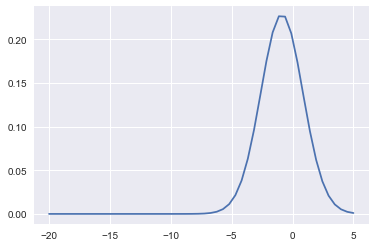

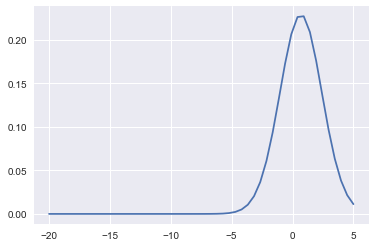

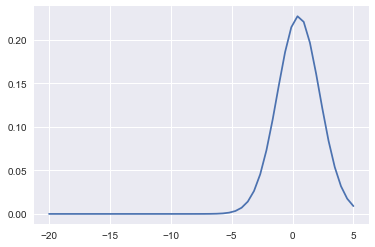

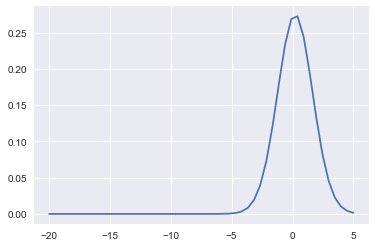

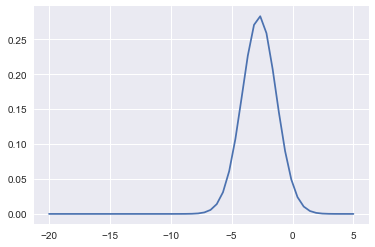

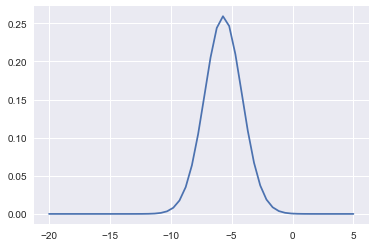

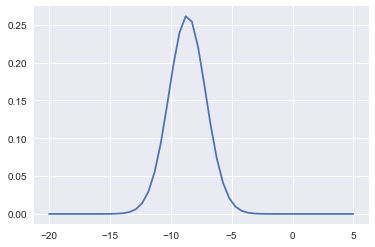

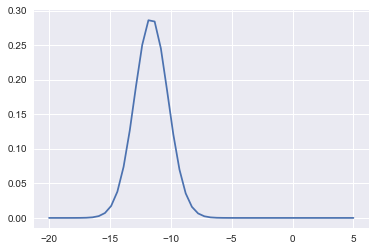

In [9]:
sig_tes, mu_tes = error_distribution(act_std_df)

In [10]:
dist_para = pd.DataFrame({'Alpha':act_std_df['act'],
                        'mu':mu_tes,
                        'sigma':sig_tes})

In [12]:
dist_para.to_csv('dist_para3.csv')